In [1]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

1. Aumentar el número de estimadores (árboles de decisión creados) y encontrar el valor óptimo de learning rate. Los otros parámetros deben dejarse constantes.
2. max_depth y min_child_weight: Estos parámetros controlan la complejidad del modelo. Usando valores altos de estos parámetros causará un sobreajuste del modelo. Por lo tanto, se debe hacer una búsqueda exhaustiva de los valores óptimos.
3. subsample y colsample_bytree: Estos parámetros controlan la sensibilidad del modelo a las observaciones. Seleccionar valores bajos para estos parámetros hace que el algoritmo sea más conservador y evita el sobreajuste. Pero, los valores demasiado pequeños pueden conducir a un subajuste del modelo.
4. reg_alpha y reg_lambda: Estos son los parámetros de regularización. Se utilizan para reducir el sobreajuste. Aquí, también se debe hacer una búsqueda exhaustiva de los valores óptimos.
5. Volver a evaluar el hyperparametro learning rate con los nuevos valores de los parámetros.
6. Entrenar el modelo con los nuevos valores de hyperparametros y comprobar el rendimiento del modelo.

Los pasos 1 a 5 se crean usando la función GridSearchCV de la biblioteca sklearn. Para el paso 6 ya no se utiliza GridSearchCV. En su lugar, se utiliza la creación de arboles con el método exact.

# Paso 1: busqueda del mejor valor para learning_rate usando GridSearchCV

In [6]:
# Cargamos los datos del GridSearchCV del archivo pickle
grid_search_lr = joblib.load(
    "..\models\Step1_GridSearchCV_AmesHousing_learning_rate.pkl"
)

In [7]:
cv_results_lr = pd.DataFrame(grid_search_lr.cv_results_)

In [8]:
cv_results_lr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.162434,2.731149,0.020668,0.004232,0.005,{'learning_rate': 0.005},-29384.692733,-25501.726273,-26431.091681,-22703.939989,-24501.509064,-25704.591948,2216.457477,2
1,8.316180,1.142528,0.019461,0.004106,0.05,{'learning_rate': 0.049999999999999996},-30468.965013,-25135.584589,-26552.752868,-23038.883868,-23241.432641,-25687.523796,2717.134290,1
2,7.270612,2.513353,0.020528,0.003891,0.095,{'learning_rate': 0.095},-30965.333451,-24864.471522,-26747.703970,-23351.285926,-23107.393783,-25807.237730,2887.909034,3
3,8.219270,3.665176,0.021045,0.002067,0.14,{'learning_rate': 0.14},-30639.493995,-24634.376612,-27086.507261,-23558.820451,-23809.666326,-25945.772929,2657.538188,4
4,7.808684,1.483891,0.018090,0.002762,0.185,{'learning_rate': 0.185},-30653.436215,-25763.138001,-27147.584284,-24055.774609,-23784.064203,-26280.799462,2502.944827,5
5,8.734418,4.100320,0.023127,0.002637,0.23,{'learning_rate': 0.22999999999999998},-30968.594417,-25447.203147,-27443.812229,-23922.877000,-24087.925326,-26374.082424,2620.987974,6
6,6.780844,1.522722,0.021964,0.003300,0.275,{'learning_rate': 0.275},-31283.966214,-24966.291027,-27585.589781,-24442.131913,-24682.442669,-26592.084321,2604.344033,7
7,8.700459,1.691754,0.020592,0.002358,0.32,{'learning_rate': 0.32},-32393.691427,-25139.804261,-27186.271276,-24944.317999,-24061.291468,-26745.075286,3004.125019,8
8,7.775527,1.802038,0.019483,0.001389,0.365,{'learning_rate': 0.365},-32789.087518,-26155.806393,-28831.002694,-25554.834572,-25368.808661,-27739.907968,2813.920301,10
9,7.837594,1.713630,0.018644,0.003771,0.41,{'learning_rate': 0.41},-32104.003597,-25640.400418,-28242.382076,-25777.132668,-26288.940845,-27610.571921,2432.278613,9


In [9]:
# Extraer los valores necesarios del DataFrame
learning_rates = cv_results_lr["param_learning_rate"]
mean_test_scores = abs(cv_results_lr["mean_test_score"])
std_test_scores = cv_results_lr["std_test_score"]

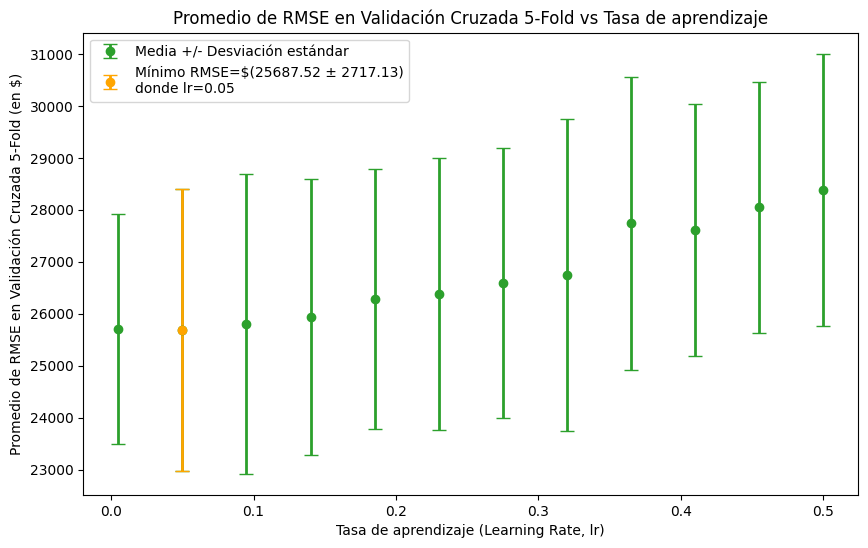

In [10]:
# Encontrar el mínimo mean_test_score y su correspondiente learning_rate
min_score = np.min(mean_test_scores)
min_score_idx = np.argmin(mean_test_scores)
min_lr = learning_rates[min_score_idx]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.errorbar(
    learning_rates,
    mean_test_scores,
    yerr=std_test_scores,
    capsize=5,
    lw=2,
    fmt="o",
    color="C2",
    label="Media +/- Desviación estándar",
)
# Resaltar el mínimo mean_test_score con un punto rojo
texto_min_lr = f"Mínimo RMSE=$({min_score:.2f} ± {std_test_scores[min_score_idx]:.2f})\ndonde lr={min_lr:.2f}"
# plt.scatter(min_lr, min_score, color="orange", zorder=5, label=texto_min_lr)

plt.errorbar(
    min_lr,
    min_score,
    yerr=std_test_scores[1],
    capsize=5,
    lw=2,
    fmt="o",
    color="orange",
    label=texto_min_lr,
)

plt.xlabel("Tasa de aprendizaje (Learning Rate, lr)")
plt.ylabel("Promedio de RMSE en Validación Cruzada 5-Fold (en $)")
plt.title("Promedio de RMSE en Validación Cruzada 5-Fold vs Tasa de aprendizaje")
plt.legend()
# plt.grid(True)
plt.show()

In [11]:
grid_search_lr.best_params_

{'learning_rate': 0.049999999999999996}

# Paso 2: busqueda del mejor valor para parámetros individuales de los árboles usando GridSearchCV

La busqueda de los mejores parámetros se realiza para max_depth y min_child_weight, usando GridSearchCV.

In [13]:
# Cargamos los datos del GridSearchCV del archivo pickle
grid_search_tree_p = joblib.load(
    "..\models\Step2_GridSearchCV_AmesHousing_tree_parameters.pkl"
)

In [14]:
grid_search_tree_p.best_params_

{'max_depth': 4, 'min_child_weight': 3}

In [15]:
cv_results_tree_p = pd.DataFrame(grid_search_tree_p.cv_results_)

In [16]:
cv_results_tree_p

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.923900,0.429751,0.016154,0.004937,3,1,"{'max_depth': 3, 'min_child_weight': 1}",-28118.913084,-24212.398645,-23133.391033,-22553.261683,-23884.516708,-24380.496231,1956.735573,15
1,3.849369,0.532372,0.016536,0.003773,3,2,"{'max_depth': 3, 'min_child_weight': 2}",-28069.774373,-25200.735027,-22911.000365,-22190.294770,-20813.949307,-23837.150768,2548.886068,5
2,3.901431,0.312417,0.016824,0.004053,3,3,"{'max_depth': 3, 'min_child_weight': 3}",-27313.809415,-25322.794882,-22672.639931,-22889.126234,-20740.879032,-23787.849899,2285.776698,3
3,3.884886,0.409177,0.018821,0.003204,3,4,"{'max_depth': 3, 'min_child_weight': 4}",-27644.842084,-25770.425868,-23371.535504,-23354.975218,-21664.744427,-24361.304620,2099.095977,14
4,3.900402,0.394561,0.019603,0.001883,3,5,"{'max_depth': 3, 'min_child_weight': 5}",-27153.823454,-24486.647743,-23265.807938,-22692.733656,-21108.991627,-23741.600883,2022.646315,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,6.577956,0.469508,0.036173,0.008594,9,60,"{'max_depth': 9, 'min_child_weight': 60}",-33051.110422,-24622.682644,-27306.930631,-24494.674169,-26893.812448,-27273.842062,3107.242105,104
101,6.786444,0.890266,0.033337,0.006551,9,70,"{'max_depth': 9, 'min_child_weight': 70}",-31727.645235,-24687.314494,-26762.246863,-24562.849865,-25331.483369,-26614.307965,2673.407080,86
102,6.287816,0.301877,0.037586,0.003516,9,80,"{'max_depth': 9, 'min_child_weight': 80}",-31895.997702,-24760.235180,-26409.628017,-24956.222273,-26082.427573,-26820.902149,2615.127736,96
103,6.876102,0.691634,0.031796,0.005875,9,90,"{'max_depth': 9, 'min_child_weight': 90}",-32921.109741,-25048.996067,-25570.276677,-24910.276517,-26171.601348,-26924.452070,3030.997090,98


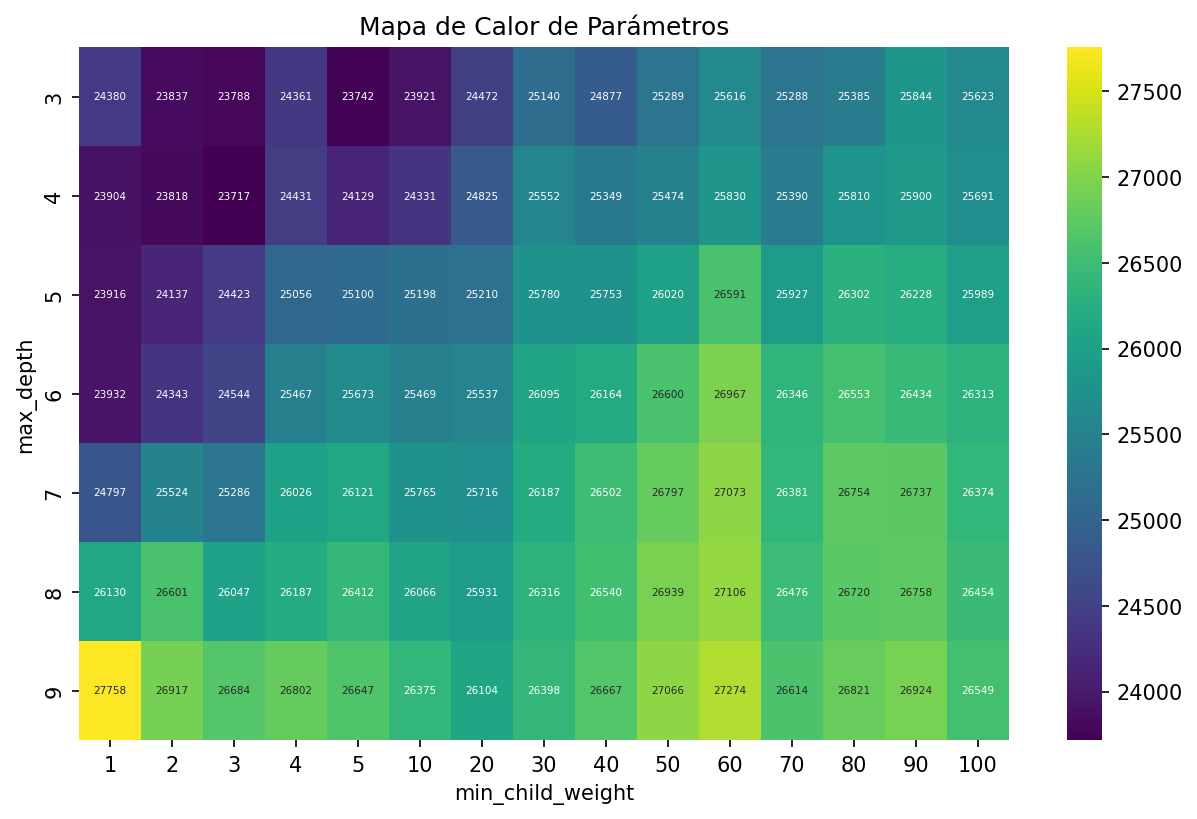

In [17]:
# Get the number of values for max_depth and min_child_weight
n = len(grid_search_tree_p.param_grid["max_depth"])
m = len(grid_search_tree_p.param_grid["min_child_weight"])

# Get the mean test scores from the GridSearchCV results and reshape them into a matrix
mean_scores_tree_p = np.array(cv_results_tree_p["mean_test_score"])
mean_scores_tree_p = mean_scores_tree_p.reshape(n, m)

# Convert the mean test scores to absolute values (GridSearchCV returns negative values)
mean_scores_tree_p = np.abs(mean_scores_tree_p)

# Create a DataFrame to visualize the data
df_tree = pd.DataFrame(
    mean_scores_tree_p,
    index=grid_search_tree_p.param_grid["max_depth"],
    columns=grid_search_tree_p.param_grid["min_child_weight"],
)
df_tree.index.name = "max_depth"
df_tree.columns.name = "min_child_weight"

# Create a heatmap to visualize the data
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(df_tree, annot=True, fmt=".0f", cmap="viridis", annot_kws={"size": 5})
plt.title("Mapa de Calor de Parámetros")
plt.show()

# Paso 3: busqueda de los valores de hyperparámetros de estocasticidad usando GridSearchCV

In [18]:
# Cargamos los datos del GridSearchCV del archivo pickle
grid_search_stoch = joblib.load(
    "..\models\Step3_GridSearchCV_AmesHousing_stochastic_params.pkl"
)

In [19]:
grid_search_stoch.best_params_

{'colsample_bytree': 0.3, 'subsample': 0.7}

In [20]:
cv_results_stoch = pd.DataFrame(grid_search_stoch.cv_results_)

In [21]:
cv_results_stoch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.038400,0.207527,0.019349,0.001730,0.1,0.1,"{'colsample_bytree': 0.1, 'subsample': 0.1}",-28788.194512,-25604.066340,-27600.469921,-22666.777721,-23138.338191,-25559.569337,2400.911464,322
1,3.393680,0.630926,0.022974,0.005280,0.1,0.15,"{'colsample_bytree': 0.1, 'subsample': 0.15}",-30073.487731,-26522.216447,-25975.749116,-23169.246867,-22493.669430,-25646.873918,2703.724381,324
2,3.268040,0.207918,0.020724,0.001748,0.1,0.2,"{'colsample_bytree': 0.1, 'subsample': 0.2}",-29881.661329,-25399.397583,-23626.343653,-22106.339338,-22658.762596,-24734.500900,2806.395670,301
3,3.235204,0.230833,0.022378,0.004212,0.1,0.25,"{'colsample_bytree': 0.1, 'subsample': 0.25}",-28530.899503,-24191.056086,-23325.535243,-21569.456847,-21244.002071,-23772.189950,2617.786582,214
4,3.308921,0.330441,0.022398,0.003302,0.1,0.3,"{'colsample_bytree': 0.1, 'subsample': 0.3}",-28608.489085,-24833.384384,-23681.413029,-21581.581605,-21633.905984,-24067.754818,2586.827929,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5.402774,0.391771,0.025088,0.004427,1,0.8,"{'colsample_bytree': 1, 'subsample': 0.8}",-29669.132975,-22979.366231,-22833.354239,-22158.164557,-21629.578686,-23853.919338,2947.757843,232
357,5.104186,0.271159,0.022299,0.001195,1,0.85,"{'colsample_bytree': 1, 'subsample': 0.85}",-28735.420133,-22837.374389,-23689.997600,-22432.393070,-22490.406689,-24037.118376,2391.709774,252
358,5.470689,0.592503,0.023389,0.004127,1,0.9,"{'colsample_bytree': 1, 'subsample': 0.9}",-29684.936556,-22622.881512,-23158.782690,-21614.913063,-21797.006358,-23775.704036,3007.087721,215
359,5.028649,0.271556,0.020546,0.002311,1,0.95,"{'colsample_bytree': 1, 'subsample': 0.95}",-28974.094841,-23395.366879,-23732.225866,-22439.970472,-21661.541702,-24040.639952,2571.875775,253


dasdasda


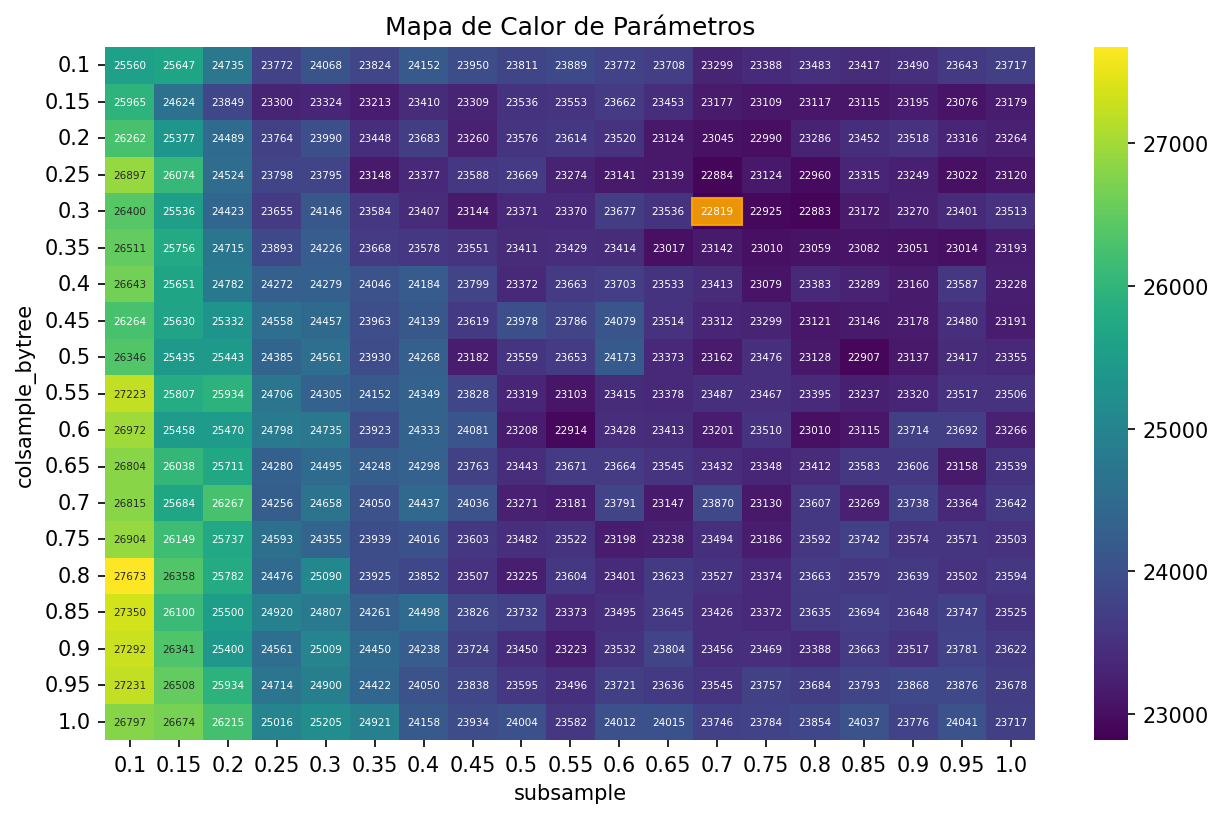

In [22]:
# Get the number of values for max_depth and min_child_weight
n = len(grid_search_stoch.param_grid["colsample_bytree"])
m = len(grid_search_stoch.param_grid["subsample"])

# Get the mean test scores from the GridSearchCV results and reshape them into a matrix
mean_scores_stoch = np.array(cv_results_stoch["mean_test_score"])
mean_scores_stoch = mean_scores_stoch.reshape(n, m)

# Convert the mean test scores to absolute values (GridSearchCV returns negative values)
mean_scores_stoch = np.abs(mean_scores_stoch)

# Create a DataFrame to visualize the data
df_tree = pd.DataFrame(
    mean_scores_stoch,
    index=grid_search_stoch.param_grid["colsample_bytree"],
    columns=grid_search_stoch.param_grid["subsample"],
)
df_tree.index.name = "colsample_bytree"
df_tree.columns.name = "subsample"

# Encuentrar la posición del valor mínimo
min_val = df_tree.min().min()
min_val_index = np.unravel_index(np.argmin(df_tree.to_numpy()), df_tree.shape)

# Create a heatmap to visualize the data
plt.figure(figsize=(10, 6), dpi=150)
ax = sns.heatmap(df_tree, annot=True, fmt=".0f", cmap="viridis", annot_kws={"size": 5})

# Resaltar la celda del valor mínimo con un borde
for t in ax.texts:
    if t.get_text() == str(round(min_val)):
        print("dasdasda")
        t.set_bbox(dict(facecolor="orange", alpha=0.9, edgecolor="orange"))

plt.title("Mapa de Calor de Parámetros")
plt.show()

# Paso 4: busqueda de hyperparámetros de regularización usando GridSearchCV

In [23]:
# Cargamos los datos del GridSearchCV del archivo pickle
grid_search_reg = joblib.load("..\models\Step4_GridSearchCV_AmesHousing_reg_params.pkl")

In [24]:
grid_search_reg.best_params_

{'reg_alpha': 1000, 'reg_lambda': 1}

In [25]:
cv_results_stoch = pd.DataFrame(grid_search_stoch.cv_results_)

In [26]:
cv_results_stoch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.038400,0.207527,0.019349,0.001730,0.1,0.1,"{'colsample_bytree': 0.1, 'subsample': 0.1}",-28788.194512,-25604.066340,-27600.469921,-22666.777721,-23138.338191,-25559.569337,2400.911464,322
1,3.393680,0.630926,0.022974,0.005280,0.1,0.15,"{'colsample_bytree': 0.1, 'subsample': 0.15}",-30073.487731,-26522.216447,-25975.749116,-23169.246867,-22493.669430,-25646.873918,2703.724381,324
2,3.268040,0.207918,0.020724,0.001748,0.1,0.2,"{'colsample_bytree': 0.1, 'subsample': 0.2}",-29881.661329,-25399.397583,-23626.343653,-22106.339338,-22658.762596,-24734.500900,2806.395670,301
3,3.235204,0.230833,0.022378,0.004212,0.1,0.25,"{'colsample_bytree': 0.1, 'subsample': 0.25}",-28530.899503,-24191.056086,-23325.535243,-21569.456847,-21244.002071,-23772.189950,2617.786582,214
4,3.308921,0.330441,0.022398,0.003302,0.1,0.3,"{'colsample_bytree': 0.1, 'subsample': 0.3}",-28608.489085,-24833.384384,-23681.413029,-21581.581605,-21633.905984,-24067.754818,2586.827929,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,5.402774,0.391771,0.025088,0.004427,1,0.8,"{'colsample_bytree': 1, 'subsample': 0.8}",-29669.132975,-22979.366231,-22833.354239,-22158.164557,-21629.578686,-23853.919338,2947.757843,232
357,5.104186,0.271159,0.022299,0.001195,1,0.85,"{'colsample_bytree': 1, 'subsample': 0.85}",-28735.420133,-22837.374389,-23689.997600,-22432.393070,-22490.406689,-24037.118376,2391.709774,252
358,5.470689,0.592503,0.023389,0.004127,1,0.9,"{'colsample_bytree': 1, 'subsample': 0.9}",-29684.936556,-22622.881512,-23158.782690,-21614.913063,-21797.006358,-23775.704036,3007.087721,215
359,5.028649,0.271556,0.020546,0.002311,1,0.95,"{'colsample_bytree': 1, 'subsample': 0.95}",-28974.094841,-23395.366879,-23732.225866,-22439.970472,-21661.541702,-24040.639952,2571.875775,253


dasdasda


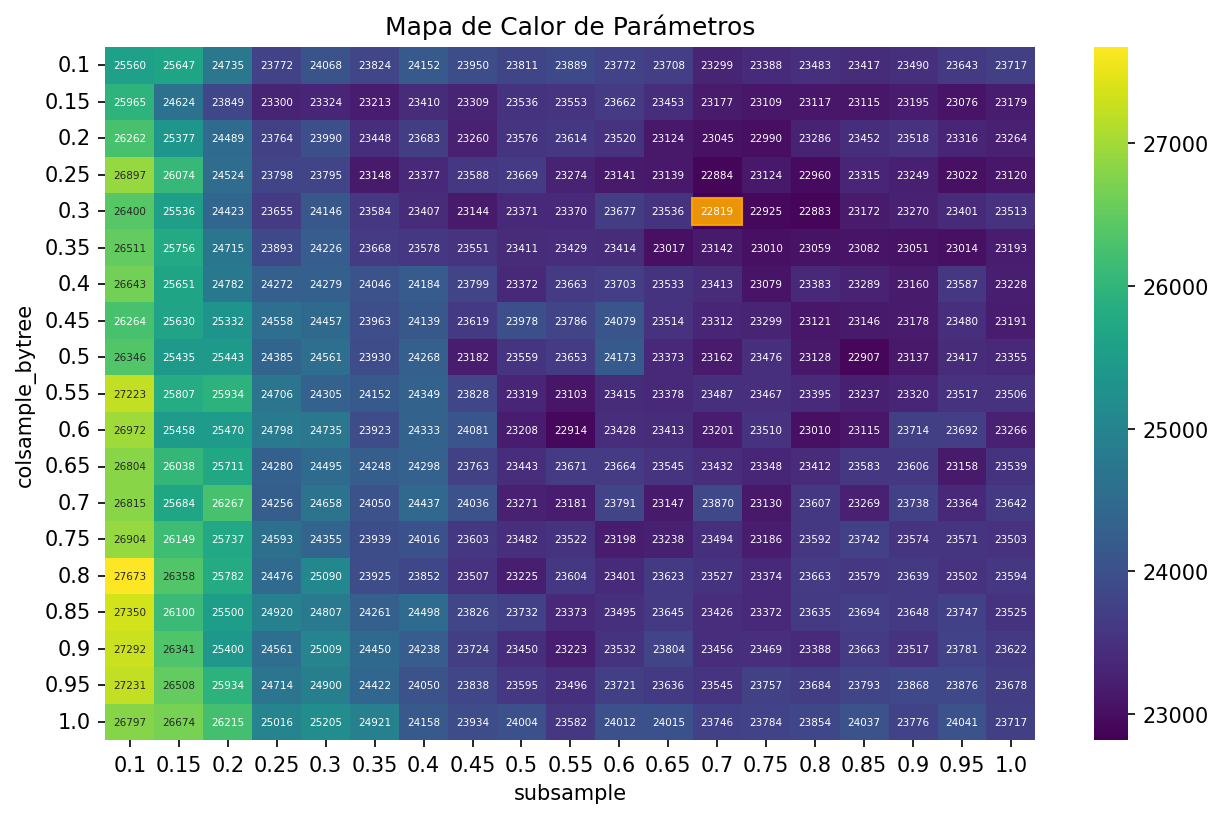

In [27]:
# Get the number of values for max_depth and min_child_weight
n = len(grid_search_stoch.param_grid["colsample_bytree"])
m = len(grid_search_stoch.param_grid["subsample"])

# Get the mean test scores from the GridSearchCV results and reshape them into a matrix
mean_scores_stoch = np.array(cv_results_stoch["mean_test_score"])
mean_scores_stoch = mean_scores_stoch.reshape(n, m)

# Convert the mean test scores to absolute values (GridSearchCV returns negative values)
mean_scores_stoch = np.abs(mean_scores_stoch)

# Create a DataFrame to visualize the data
df_tree = pd.DataFrame(
    mean_scores_stoch,
    index=grid_search_stoch.param_grid["colsample_bytree"],
    columns=grid_search_stoch.param_grid["subsample"],
)
df_tree.index.name = "colsample_bytree"
df_tree.columns.name = "subsample"

# Encuentrar la posición del valor mínimo
min_val = df_tree.min().min()
min_val_index = np.unravel_index(np.argmin(df_tree.to_numpy()), df_tree.shape)

# Create a heatmap to visualize the data
plt.figure(figsize=(10, 6), dpi=150)
ax = sns.heatmap(df_tree, annot=True, fmt=".0f", cmap="viridis", annot_kws={"size": 5})

# Resaltar la celda del valor mínimo con un borde
for t in ax.texts:
    if t.get_text() == str(round(min_val)):
        print("dasdasda")
        t.set_bbox(dict(facecolor="orange", alpha=0.9, edgecolor="orange"))

plt.title("Mapa de Calor de Parámetros")
plt.show()

# Paso 5: volver a hacer una búsqueda de la taza de aprendizaje usando GridSearchCV

In [28]:
# Cargamos los datos del GridSearchCV del archivo pickle
grid_search_lr = joblib.load("..\models\Step5_GridSearchCV_AmesHousing_confirm_lr.pkl")

In [29]:
cv_results_lr = pd.DataFrame(grid_search_lr.cv_results_)

In [30]:
cv_results_lr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.723576,1.785627,0.014003,0.000852,0.01,{'learning_rate': 0.01},-27751.734736,-22644.358511,-21276.057774,-21270.573633,-20715.711327,-22731.687196,2589.454466,4
1,5.543881,2.153293,0.013878,0.000522,0.02,{'learning_rate': 0.02},-27862.730129,-22024.266767,-20784.334499,-21431.055354,-20306.069318,-22481.691214,2752.562555,1
2,5.478219,2.202575,0.013833,0.000539,0.03,{'learning_rate': 0.03},-27513.040469,-22561.299246,-21452.915101,-21270.075901,-19985.470781,-22556.560299,2609.608947,2
3,5.950023,2.502763,0.015332,0.000774,0.04,{'learning_rate': 0.04},-27427.067125,-23033.001080,-21859.418790,-21586.606716,-19869.605049,-22755.139752,2545.514027,5
4,5.157001,1.861414,0.015765,0.000793,0.05,{'learning_rate': 0.05},-27610.061798,-22745.652566,-21876.261476,-21675.758582,-19506.953455,-22682.937575,2684.492401,3
5,5.791191,2.761838,0.015311,0.000833,0.06,{'learning_rate': 0.06},-28459.856905,-23154.488793,-21136.862787,-21868.821259,-19518.170754,-22827.640100,3051.535517,6
6,6.012789,0.216547,0.016071,0.001665,0.07,{'learning_rate': 0.07},-28046.804935,-22896.662996,-21401.860315,-22541.475705,-20494.234489,-23076.207688,2626.596136,8
7,5.556100,1.466632,0.015243,0.001882,0.08,{'learning_rate': 0.08},-27912.670134,-22875.713978,-21793.924451,-22105.537512,-20318.164706,-23001.202156,2592.168573,7
8,5.848308,1.057306,0.014102,0.002362,0.09,{'learning_rate': 0.09},-29275.183364,-23176.167976,-22437.109539,-21743.259279,-20915.925060,-23509.529044,2978.270419,9
9,5.402659,1.873714,0.016498,0.002466,0.1,{'learning_rate': 0.1},-28501.373878,-24381.212812,-22161.686290,-21509.398402,-21365.661362,-23583.866549,2685.668946,10


In [31]:
# Extraer los valores necesarios del DataFrame
learning_rates = cv_results_lr["param_learning_rate"]
mean_test_scores = abs(cv_results_lr["mean_test_score"])
std_test_scores = cv_results_lr["std_test_score"]

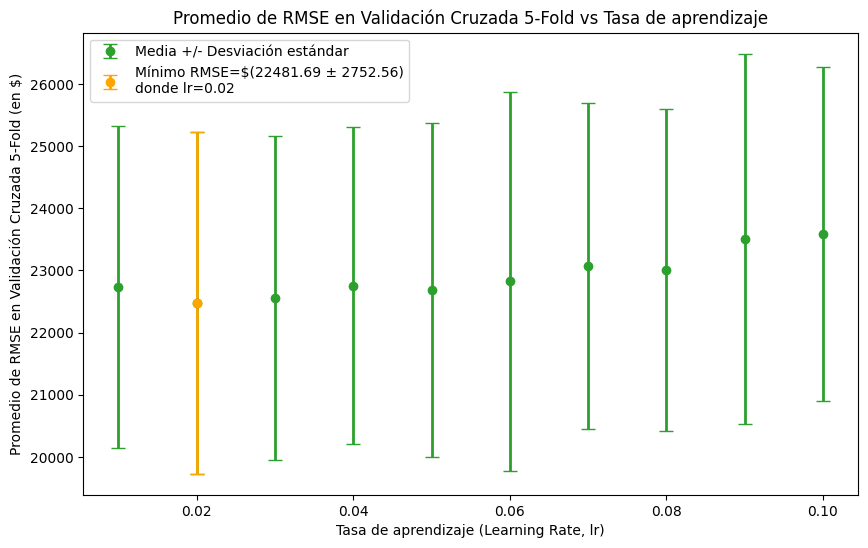

In [32]:
# Encontrar el mínimo mean_test_score y su correspondiente learning_rate
min_score = np.min(mean_test_scores)
min_score_idx = np.argmin(mean_test_scores)
min_lr = learning_rates[min_score_idx]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.errorbar(
    learning_rates,
    mean_test_scores,
    yerr=std_test_scores,
    capsize=5,
    lw=2,
    fmt="o",
    color="C2",
    label="Media +/- Desviación estándar",
)
# Resaltar el mínimo mean_test_score con un punto rojo
texto_min_lr = f"Mínimo RMSE=$({min_score:.2f} ± {std_test_scores[min_score_idx]:.2f})\ndonde lr={min_lr:.2f}"
# plt.scatter(min_lr, min_score, color="orange", zorder=5, label=texto_min_lr)

plt.errorbar(
    min_lr,
    min_score,
    yerr=std_test_scores[1],
    capsize=5,
    lw=2,
    fmt="o",
    color="orange",
    label=texto_min_lr,
)

plt.xlabel("Tasa de aprendizaje (Learning Rate, lr)")
plt.ylabel("Promedio de RMSE en Validación Cruzada 5-Fold (en $)")
plt.title("Promedio de RMSE en Validación Cruzada 5-Fold vs Tasa de aprendizaje")
plt.legend()
# plt.grid(True)
plt.show()

In [33]:
grid_search_lr.best_params_

{'learning_rate': 0.02}

# Mejores hyperparámetros encontrados

- learning_rate=0.02
- max_depth=4
- min_child_weight=3
- subsample=0.7
- colsample_bytree=0.3
- reg_alpha=1000
- reg_lambda=1